In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [30]:
X,y = make_blobs(n_samples=200,centers=2,random_state=42)

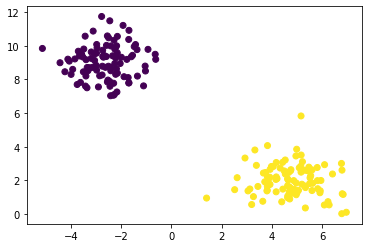

In [53]:
plt.scatter(X[:,0],X[:,1],c=y)

In [31]:
X.shape

(200, 2)

In [32]:
y.shape

(200,)

In [47]:
class CustomlogReg:
    def __init__(self,lr=0.1,max_iters = 50):
        self.lr = lr
        self.max_iters = max_iters
    def fit(self,X,y):
        X = np.hstack([np.ones((X.shape[0],1)),X])
        self.thetha = np.random.randn(X.shape[1],1)
        for i in range(self.max_iters):
            self.gradient_ascend(X,y)
    def gradient_ascend(self,X,y):
        delta_thetha = self.gradient(X,y)
        self.thetha += delta_thetha
    def gradient(self,X,y):
        ya = y.reshape(-1,1)
        yp = self.hypo(X)
        diff = (ya-yp)
        dllthetha = np.dot(X.T,diff)/len(X)
        return self.lr * dllthetha
    def hypo(self,X):
        g = np.dot(X,self.thetha)
        return 1/(1+np.exp(-g))
    def predict(self,X):
        X = np.hstack([np.ones((X.shape[0],1)),X])
        result = self.hypo(X)
        return (result > 0.5).astype(int).flatten()
    def score(self,X,y):
        yp = self.predict(X)
        return (yp==y).mean()

In [48]:
model = CustomlogReg()

In [49]:
model.fit(X,y)

In [50]:
model.predict(X[:10])

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [51]:
model.score(X,y)

1.0